In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"C:\Users\KIIT\Desktop\100 Days of ML\Datasets\titanic.csv",usecols=['Survived','Age','Fare'])

In [5]:
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [6]:
df.isnull().mean()*100

Survived     0.000000
Age         20.574163
Fare         0.239234
dtype: float64

In [21]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Survived']),df['Survived'],test_size=0.2,random_state=2)

In [22]:
X_train['Age_Imputed'] = X_train['Age']
X_test['Age_Imputed'] = X_test['Age']

In [23]:
X_train.tail()

,Age,Fare,Age_Imputed
299,29.0,7.8542,29.0
22,NaN,31.6833,NaN
72,29.0,7.9250,29.0
15,24.0,27.7208,24.0
168,NaN,27.7208,NaN


In [24]:
X_train['Age_Imputed'][X_train['Age_Imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

C:\Users\KIIT\AppData\Local\Temp\ipykernel_13096\141758617.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['Age_Imputed'][X_train['Age_Imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values


In [25]:
X_test['Age_Imputed'][X_test['Age_Imputed'].isnull()] = X_test['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

C:\Users\KIIT\AppData\Local\Temp\ipykernel_13096\2367990747.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_test['Age_Imputed'][X_test['Age_Imputed'].isnull()] = X_test['Age'].dropna().sample(X_test['Age'].isnull().sum()).values


In [26]:
X_test

,Age,Fare,Age_Imputed
146,NaN,51.8625,31.0
223,21.0,7.7958,21.0
193,61.0,12.3500,61.0
305,64.0,26.5500,64.0
188,NaN,69.5500,15.0
...,...,...,...
348,24.0,13.5000,24.0
30,50.0,26.0000,50.0
174,40.0,31.3875,40.0
68,31.0,28.5375,31.0


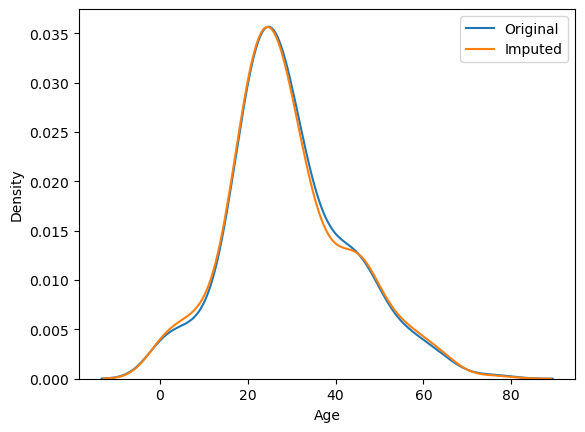

In [35]:
sns.kdeplot(X_train['Age'],label='Original')
sns.kdeplot(X_train['Age_Imputed'],label='Imputed')

plt.legend()
plt.show()

In [ ]:
X_train[['Age','Age_Imputed']].var()
# no significant change in variance due to random sampling.

Age            184.704030
Age_Imputed    191.516336
dtype: float64

In [38]:
X_train[['Fare','Age','Age_Imputed']].cov()
# a significant change in co-variance due to random sampling.

,Fare,Age,Age_Imputed
Fare,2333.007047,216.034928,180.212610
Age,216.034928,184.704030,184.704030
Age_Imputed,180.212610,184.704030,191.516336


<Axes: >

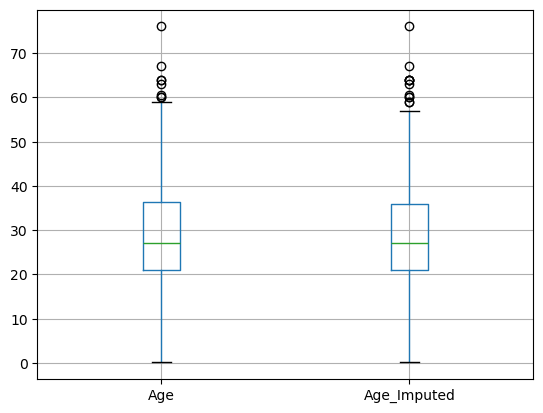

In [41]:
X_train[['Age','Age_Imputed']].boxplot()
# no effect on outliers

In [56]:
houses = pd.read_csv(r"C:\Users\KIIT\Desktop\100 Days of ML\Datasets\house-train.csv",usecols=['GarageQual','FireplaceQu','SalePrice'])

In [57]:
houses

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,Gd,TA,266500
1458,NaN,TA,142125


In [58]:
houses.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [59]:
X_train,X_test,y_train,y_test = train_test_split(houses,houses['SalePrice'],test_size=0.2,random_state=2)

In [60]:
X_train

,FireplaceQu,GarageQual,SalePrice
455,TA,TA,175500
863,NaN,TA,132500
504,Fa,TA,147000
1413,Gd,TA,257000
1389,Gd,TA,131000
...,...,...,...
466,Po,TA,167000
299,Gd,TA,158500
493,Fa,TA,155000
527,Gd,TA,446261


In [62]:
X_train['FireplaceQu_Imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_Imputed'] = X_test['FireplaceQu']

X_train['GarageQual_Imputed'] = X_train['GarageQual']
X_test['GarageQual_Imputed'] = X_test['GarageQual']

In [64]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,FireplaceQu_Imputed,GarageQual_Imputed
831,NaN,TA,151000,NaN,TA
1014,Gd,TA,119200,Gd,TA
1331,NaN,TA,132500,NaN,TA
1325,NaN,NaN,55000,NaN,NaN
1438,NaN,TA,149700,NaN,TA


In [66]:
X_train['FireplaceQu_Imputed'][X_train['FireplaceQu_Imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_Imputed'][X_test['FireplaceQu_Imputed'].isnull()] = X_test['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values


C:\Users\KIIT\AppData\Local\Temp\ipykernel_13096\3431818145.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['FireplaceQu_Imputed'][X_train['FireplaceQu_Imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['Firepla

In [68]:
X_train['GarageQual_Imputed'][X_train['GarageQual_Imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_Imputed'][X_test['GarageQual_Imputed'].isnull()] = X_test['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values


C:\Users\KIIT\AppData\Local\Temp\ipykernel_13096\949291410.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['GarageQual_Imputed'][X_train['GarageQual_Imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'

In [70]:
X_train.sample(7)

,FireplaceQu,GarageQual,SalePrice,FireplaceQu_Imputed,GarageQual_Imputed
650,NaN,TA,205950,Gd,TA
738,NaN,NaN,179000,Fa,TA
162,Gd,TA,220000,Gd,TA
247,TA,TA,140000,TA,TA
1182,TA,TA,745000,TA,TA
1275,NaN,TA,137000,Gd,TA
1190,TA,TA,168000,TA,TA


In [ ]:
# the below distribution shows that the pdf changes for various categories of FirePlaceQu w.r.t. SalePrice 
# since FirePlaceQu has a lot of missing data.

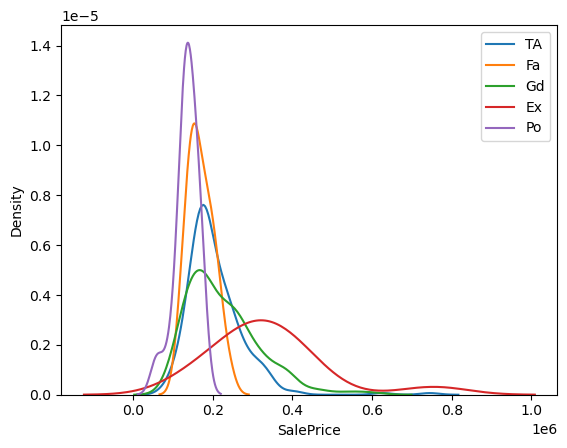

In [ ]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu']==category]['SalePrice'],label=category)
plt.legend()
plt.show()    

# Here we are plotting the PDF (via KDE) of SalePrice for each category of the FireplaceQu feature in X_train.
# for loop above means you're iterating over all unique fireplace quality categories (ignoring NaN).
# X_train[X_train['FireplaceQu'] == category]: filters rows where FireplaceQu == category (e.g., only rows where fireplace quality is "Ex").
# ['SalePrice']: selects the SalePrice column for those rows.
# sns.kdeplot(...): plots the KDE (smoothed PDF) of SalePrice for that group.

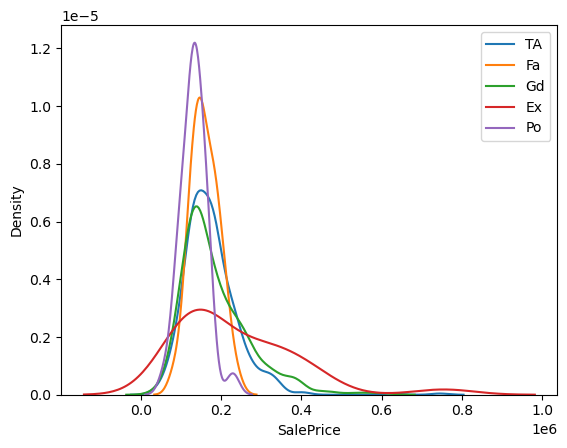

In [75]:
for category in X_train['FireplaceQu_Imputed'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu_Imputed']==category]['SalePrice'],label=category)
plt.legend()
plt.show()    

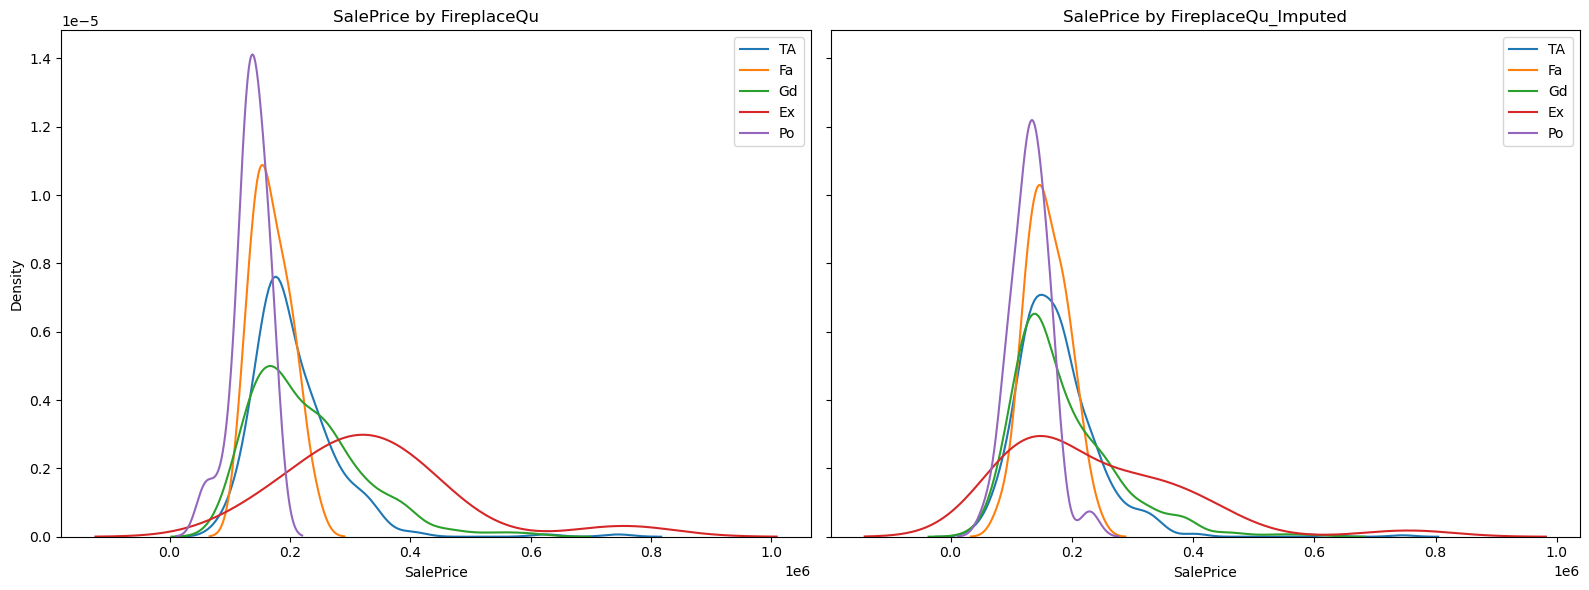

In [ ]:
# ChatGPT
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

for category in X_train['FireplaceQu'].dropna().unique():
    sns.kdeplot(
        X_train[X_train['FireplaceQu'] == category]['SalePrice'],
        label=category,
        ax=axes[0]
    )
axes[0].set_title('SalePrice by FireplaceQu')
axes[0].set_xlabel('SalePrice')
axes[0].set_ylabel('Density')
axes[0].legend()

# ---- Plot 2: FireplaceQu_Imputed ----
for category in X_train['FireplaceQu_Imputed'].dropna().unique():
    sns.kdeplot(
        X_train[X_train['FireplaceQu_Imputed'] == category]['SalePrice'],
        label=category,
        ax=axes[1]
    )
axes[1].set_title('SalePrice by FireplaceQu_Imputed')
axes[1].set_xlabel('SalePrice')
axes[1].legend()

plt.tight_layout()
plt.show()